<div align=center>

# Basic Example of CNN Application

By Hamed Araab

Supervisor: Dr. Marzieh Zarinbal

</div>


### Prerequisites


In [38]:
import matplotlib.pyplot as plt
import tensorflow.keras as keras

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from keras.datasets import mnist
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, MaxPooling2D, Conv2D
from keras.activations import sigmoid, relu, softmax
from keras.optimizers import SGD, Adam
from keras.losses import categorical_crossentropy
from keras.metrics import CategoricalAccuracy

### Loading the MNIST Dataset


In [39]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Data Preprocessing


In [40]:
X_train = X_train.reshape((60000, 28, 28, 1)) / 255
X_test = X_test.reshape((10000, 28, 28, 1)) / 255

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

### Visualizing the Dataset


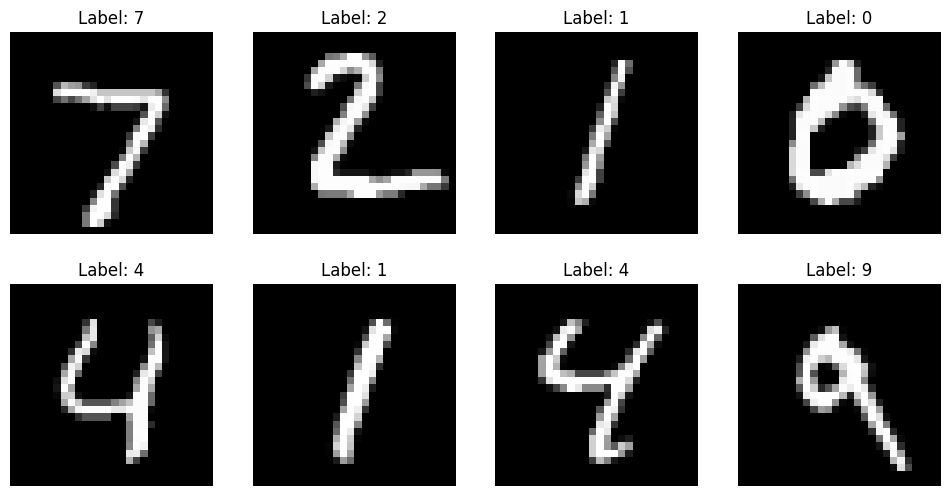

In [41]:
sample_images = X_test[:8, :, :, :]
sample_labels = Y_test[:8, :]

plt.figure(figsize=(12, 6))

for i in range(sample_images.shape[0]):
    plt.subplot(2, 4, i + 1)
    plt.imshow(sample_images[i, :, :, :], cmap="gray")
    plt.title(f"Label: {sample_labels[i, :].argmax()}")
    plt.axis("off")

plt.show()

### Building the CNN Model


In [42]:
model = Sequential()

model.add(Input(shape=(28, 28, 1)))

model.add(
    Conv2D(
        filters=3,
        kernel_size=(3, 3),
        activation=sigmoid,
        padding="same",
        strides=(1, 1),
    )
)

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(
    Conv2D(
        filters=3,
        kernel_size=(3, 3),
        activation=sigmoid,
        padding="same",
        strides=(1, 1),
    )
)

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(units=10, activation=softmax))

model.compile(
    loss=categorical_crossentropy,
    optimizer=SGD(learning_rate=1.0),
    metrics=[CategoricalAccuracy()],
)

model.summary()

model.fit(
    X_train,
    Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, Y_test),
)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 3)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 3)      │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 147)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,480 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,594 (6.23 KB)

 Trainable params: 1,594 (6.23 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - categorical_accuracy: 0.3791 - loss: 1.6518 - val_categorical_accuracy: 0.9425 - val_loss: 0.1929
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.9394 - loss: 0.1950 - val_categorical_accuracy: 0.9502 - val_loss: 0.1556
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.9519 - loss: 0.1543 - val_categorical_accuracy: 0.9580 - val_loss: 0.1384
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.9579 - loss: 0.1352 - val_categorical_accuracy: 0.9595 - val_loss: 0.1269
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.9608 - loss: 0.1268 - val_categorical_accuracy: 0.9619 - val_loss: 0.1189
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9638 - loss: 0.1163 - val_categorical_accuracy: 0.9646 - val_loss: 0.1099
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accurac

### Evaluating the Model


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


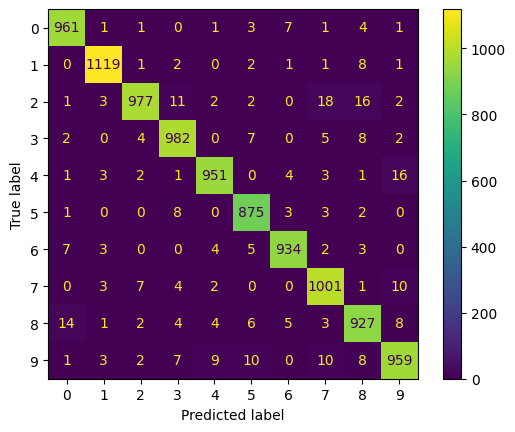

In [43]:
Y_test_hat = model.predict(X_test)

ConfusionMatrixDisplay(
    confusion_matrix(
        Y_test.argmax(axis=1, keepdims=True),
        Y_test_hat.argmax(axis=1, keepdims=True),
    ),
    display_labels=range(10),
).plot()